# Aprendizaje y evaluación de modelos

##  Introducción

El objetivo del ejercicio planteado consiste en comparar el rendimiento de 3 modelos de Machine Learning diferentes. Para ello, vamos a utilizar un set de datos llamado 'mtcars' sobre coches clásicos para ajustar y evaluar los 3 modelos:
1. Modelo de regresión lineal sobre todas las variables
1. Modelo de regresión lineal sobre las variables más representativas
1. Otro modelo de regresión lineal a elegir: https://scikit-learn.org/stable/modules/linear_model.html

Referencias:
- https://gallery.cortanaintelligence.com/Notebook/Evaluating-Multiple-Models-6
- https://gallery.cortanaintelligence.com/
- https://notebooks.azure.com/library/eSJDgAFMXAY

## Cargar datos
Cargar datos y mostrar dimensionalidad

In [2]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore')

import pydataset
from pydataset import data
df = data('mtcars')
df.shape

(32, 11)

Ver distribución de valores y estadística básica: media, std, max, min, percentiles...

In [3]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


Mostrar valores de las variables de los 10 primeros registros del dataset

In [4]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


La descripción de las variables sería la siguiente:
- mpg: Miles/(US) gallon
- cyl: Number of cylinders
- disp: Displacement (cu.in.)
- hp: Gross horsepower
- drat: Rear axle ratio
- wt: Weight (1000 lbs)
- qsec: 1/4 mile time
- vs: Engine (0 = V-shaped, 1 = straight)
- am: Transmission (0 = automatic, 1 = manual)
- gear: Number of forward gears
- carb: Number of carburetors

Según el peso del coche, 'wt', y el tipo de cambio (manual/automático), 'am': ¿qué tipos de coches consumen más? Por lógica, deben sonsumir más los más pesados y con un tipo de cambio manual, pero necesitamos corroborar o justificar esa hipótesis a partir de los datos.

La hipotesis planteada es valida


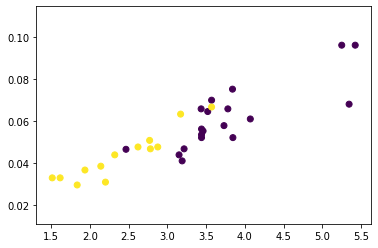

In [6]:
import numpy as np
import matplotlib.pyplot as plt


plt.scatter( df['wt'],1/df['mpg'], c=df['am'])



# RESPUESTA 1
print('La hipotesis planteada es valida')

Vamos a aprender modelos de Machine Learning capaces de predecir el consumo de gasolina, 'mpg', a partir de las otras variables. Para ello, lo primero que haremos será separar el dataset en training y test sets: 
- training set para entrenar el modelo
- test set para evaluarlo

In [7]:
from sklearn.model_selection import train_test_split

# separar el set de características en variables predictoras, 'X', y variable objetivo, 'y'
y = df['mpg'].values
X = df.drop('mpg', 1).values
feature_names = df.drop('mpg', 1).columns

# RESPUESTA 2
# reservar 33% del dataset original (1/3) para test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=123)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((21, 10), (11, 10), (21,), (11,))

Se puede apreciar que el número de variables predictoras es similar al número de registros disponibles que vamos a utilizar para el test. Esto nos va producir modelos sobreentrenados (overfitting) que obtienen predicciones muy buenas en la fase de training pero un rendimiento pobre en cuando a los datos de test. 

## Ajuste de los modelos

### Modelo lineal sobre todas las variables
Para ajustar el modelo lineal al conjunto de training, en primera instancia usaremos todas las variables predictoras

In [8]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
# RESPUESTA 3
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Una vez ajustado, mostramos el valor de precisión R² respecto de los valores reales de 'mpg' vs los estimados por el modelo. También mostramos los coeficientes de ajuste para las variables predictoras.

In [9]:
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#realizar la predicción
y_lm_predic_train = lm.predict(X_train)

# RESPUESTA 4
# mostrar R^2 respecto del training set
r2_train = r2_score(y_train,y_lm_predic_train)
print('El valor de R² para el training set es: ' + str(r2_train))

# mostrar coeficientes
param_df = pd.DataFrame({"Coefficient": [lm.intercept_] + list(lm.coef_),
                         "Feature": ['intercept'] + list(feature_names)})
param_df[['Feature', 'Coefficient']]

El valor de R² para el training set es: 0.8768897450384063


,Feature,Coefficient
0,intercept,-27.031706
1,cyl,0.708185
2,disp,0.023999
3,hp,-0.014622
4,drat,1.694177
5,wt,-5.196545
6,qsec,2.646786
7,vs,0.364851
8,am,5.332754
9,gear,-0.357118


En base a los resultados obtenidos: ¿qué varianza estaríamos explicando con nuestro modelo respecto de los valores de la variable objetivo, 'mpg'?

In [10]:
# RESPUESTA 5
(np.var(y_lm_predic_train)/np.var(y_train))*100


87.68897450384058

Vamos ahora con el test set: ¿qué resultados obtenemos en relación al R²?

In [11]:
#realizar la predicción
y_lm_predic_test = lm.predict(X_test)

# mostrar R^2 respecto del test set 
r2_test = r2_score(y_test,y_lm_predic_test)
print('El valor de R² para el test set es: ' + str(r2_test))

# RESPUESTA 6
# mostrar también otras métricas de evaluación del modelo: 
# - mean absolute error (mae)
# - root mean squared error (rmse)
# - relative absolute error (rae)
# - relative squared error (rse)

def metrics(y_real,y_predic):
    r2 = r2_score(y_real,y_predic)
    mae =  mean_absolute_error(y_real,y_predic)
    rmse = mean_squared_error(y_real,y_predic)
    summary_df = pd.DataFrame(index = ['R-squared', 'Mean Absolute Error', 'Root Mean Squared Error'])       
    summary_df['metrics'] = [r2, mae, rmse]
    return(summary_df)

summary_df = metrics(y_test,y_lm_predic_test)
print(summary_df)

El valor de R² para el test set es: 0.6431806922395045
                           metrics
R-squared                 0.643181
Mean Absolute Error       2.902085
Root Mean Squared Error  11.262751


En base al valor obtenido, comparándolo respecto del R² que vimos en la fase de training: ¿qué problema nos encontramos?

### El nuevo valor a disminuido ya que estos datos son desconocidos para el modelo

### Modelo lineal sobre las variables más representativas

Una posible manera de reducir el overfitting consiste en eliminar ciertas variables predictoras del dataset. Obviamente, el objetivo sería no utilizar las variables que no aportan ningún tipo de información al problema que queremos resolver. Para ello, vamos a aplicar recursive feature elimination (RFE). RFE ajusta varios modelos y compara su rendimiento, requiriendo por tanto los datasets de training y test. Reservaremos el dataset de test utilizado previamente para comparar modelos de manera equitativa. Para la evaluación del RFE necesitaremos reservar ciertos datos de training (X_train, y_train) para cada ronda de ajuste. Aplicaremos cross-validation con 'scikit-learn': https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html

También aplicaremos un escalado de las variables, para evitar que la magnitud nos estropee el modelo 

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
import seaborn as sns

# RESPUESTA 7
# escalamos cada variable a media 0 y varianza 1: x' = (x - media) / std
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# RESPUESTA 8
# eliminación recursiva de variables con CV=10, usando R² como métrica para evaluar el modelo
lm = LinearRegression()  # modelo lineal
rfe = RFECV(lm, cv=10)
rfe.fit(X_scaled, y_train)

# mostrar número óptimo de variables
print('Optimal number of features: {}'.format(rfe.n_features_))

# variables seleccionadas
print('Features selected: {}'.format(', '.join(np.array(feature_names)[rfe.support_].tolist())))

# obtener el orden de importancia
ranked_features, _ = zip(*sorted(zip(feature_names, rfe.ranking_.tolist()),
                                 key=lambda x: x[1],
                                 reverse=True))
print('Suggested order of feature removal: {}'.format(', '.join(ranked_features)))

Optimal number of features: 3
Features selected: wt, qsec, am
Suggested order of feature removal: vs, gear, drat, carb, hp, cyl, disp, wt, qsec, am


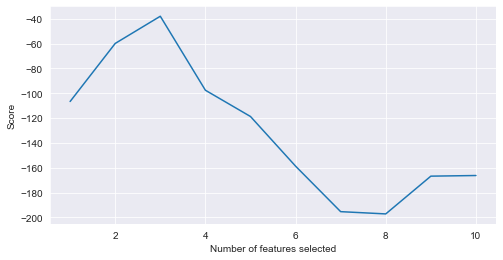

In [13]:
# plotear número de variables vs valores de R²
sns.set_style("darkgrid")
plt.figure(figsize=(8, 4))
plt.xlabel("Number of features selected")
plt.ylabel("Score")
plt.plot(range(1, len(rfe.grid_scores_) + 1), rfe.grid_scores_)
plt.show()

Los resultados deberían mostrar cómo el modelo, testeado con la estrategia CV, mejora con un número reducido pero relevante de variables. Como cabía esperar según lo visto anteriormente, el peso (wt) y el tipo de transmisión (am) estarían entre las variables a eliminar en última instancia ya que aportan cierta información al predecir nuestra variable objetivo (mpg).

Ya podemos ajustar el modelo lineal usando los datos de test que hemos utilizado en el caso anterior y así comparar de manera equitativa ambos modelos. Usaremos las mismas métricas que hemos visto antes: R², mae, rmse, rae y rse

In [14]:
X_train_subset = X_train[:, rfe.support_]
lm2 = LinearRegression()
lm2.fit(X_train_subset, y_train)

X_test_part = X_test[:, rfe.support_]
predicted = lm2.predict(X_test_part)

metrics(y_test, predicted)

,metrics
R-squared,0.733134
Mean Absolute Error,2.479904
Root Mean Squared Error,8.423435


¿Qué modelo obtendría mejores resultados y respecto de qué métricas? Tener en cuenta también el hecho de utilizar más o menos variables en términos de procesamiento, almacenaje, etc.

### Modelo a elegir

Seleccionar otro modelo de regresión lineal de scikit-learn y realizar el mismo análisis:
- https://scikit-learn.org/stable/modules/linear_model.html  

Aplicar nuestro modelo a todos los datos. Ajustar el modelo al dataset de entrenamiento y generar resultados para el conjunto de test

In [15]:
import sklearn.linear_model as linear_model

my_model = linear_model.LassoLars(alpha=.2)
my_model.fit(X_train, y_train)

predicted = my_model.predict(X_test)

metrics(y_test, predicted)

,metrics
R-squared,0.855751
Mean Absolute Error,1.784300
Root Mean Squared Error,4.553128


Comparar resultados entre sí, incluyendo los 3 modelos: ¿cuál obtiene mejores resultados? El objetivo sería que nuestro modelo sea capaz de superar los modelos de regresión lineal vistos


### El mejor modelo es LassoLars

Seleccionar el mejor modelo, ajustarlo a todos los valores de las variables utilizadas reservando el último registro (no lo usamos para el ajuste). Guardar el modelo así entrenado disco

In [16]:
from sklearn.externals import joblib
# RESPUESTA 9
reg_last = df.iloc[-1]
joblib.dump(my_model.fit(df.drop('mpg',axis=1).iloc[:-1],df['mpg'].iloc[:-1]), 'EvaluatingMultipleModels.pkl')
reg_last

C:\Users\gallastegi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


mpg      21.40
cyl       4.00
disp    121.00
hp      109.00
drat      4.11
wt        2.78
qsec     18.60
vs        1.00
am        1.00
gear      4.00
carb      2.00
Name: Volvo 142E, dtype: float64

Cargar el modelo generado y clasificar el registro que hemos reservado en el paso previo, comparándolo con el valor real

In [17]:
# RESPUESTA 10
my_loaded_model = joblib.load('EvaluatingMultipleModels.pkl')
print(my_loaded_model)
print(my_loaded_model.predict(reg_last.drop('mpg').values.reshape(1,-1)))
print(reg_last['mpg'])

LassoLars(alpha=0.2, copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
          fit_path=True, max_iter=500, normalize=True, positive=False,
          precompute='auto', verbose=False)
[23.82887552]
21.4


Hecho! Ya tenemos nuestro modelo sencillo para futuras predicciones

## Conclusión

Con lo visto en clase y en este ejercicio, ya tenemos criterio para entrenar y generar un modelo sencillo en base a un conjunto de datos. En concreto:
- Hemos diseñado el problema a resolver, separando el set de datos en training y test para evitar overfitting
- Hemos entrenado y validado modelos, comparándolos entre sí
- Hemos probado a eliminar variables irrelevantes para el problema y ver cómo afecta a los modelos
- Hemos generado el mejor modelo a disco y lo hemos cargado para predecir un 'nuevo' registro

En la siguiente sesión, empezaremos a ver diferentes modelos según el tipo de aprendizaje a aplicar. Para empezar, modelos supervisados...